In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(np.hstack([np.random.randn(10000, 3), np.random.randint(1, 50, (10000, 1))]), columns=list('ABCD'))

In [4]:
df.describe()

,A,B,C,D
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.011462,-0.006911,0.008260,25.022900
std,1.006702,0.990707,0.994182,14.145621
min,-3.947395,-4.355591,-3.647854,1.000000
25%,-0.682985,-0.678225,-0.667256,13.000000
50%,0.014073,-0.021441,0.009150,25.000000
75%,0.696907,0.671634,0.681060,37.000000
max,3.631424,3.807283,3.745537,49.000000


In [5]:
len(sorted(df.D.unique()))

49

In [6]:
df.rename(columns={'A':'A_'}, inplace=True)  # inplace=True makes it so you dont have to reassign to itself ==>   df=df.rename..

In [7]:
df

,A_,B,C,D
0,0.934486,0.389035,0.473871,19.0
1,0.422561,0.809343,-1.746644,39.0
2,1.537296,-1.311474,-1.831301,35.0
3,-1.823476,0.129008,-1.120178,13.0
4,2.471134,-0.168630,-0.158949,7.0
...,...,...,...,...
9995,-0.169773,0.200896,-0.073990,39.0
9996,-0.844492,0.661448,-1.253879,28.0
9997,-1.627677,0.538574,-0.526668,29.0
9998,0.649186,0.169811,0.854829,32.0


In [8]:
print(df.min(), '\n')
print(df.A_.max(), '\n')
print(df.A_.agg(['mean', 'std']), '\n')

A_   -3.947395
B    -4.355591
C    -3.647854
D     1.000000
dtype: float64 

3.631424063539858 

mean    0.011462
std     1.006702
Name: A_, dtype: float64 



In [15]:
df['A_']=df.A_.astype(np.int8)

In [16]:
df.skew()

A_    0.032409
B     0.003147
C    -0.004632
D    -0.003656
dtype: float64

In [17]:
df.kurtosis()  # tells us about the distribution (how pointy / thin the peak is)

A_    2.137224
B    -0.011043
C    -0.036604
D    -1.193056
dtype: float64

In [18]:
df.drop('B', axis=1, inplace=True)

In [19]:
df.groupby('D').mean().head()

,A_,C
D,,
1.0,-0.033493,0.046542
2.0,-0.059091,0.145832
3.0,0.055838,-0.072886
4.0,-0.025381,0.003782
5.0,0.036842,0.141236


<IPython.core.display.Javascript object>


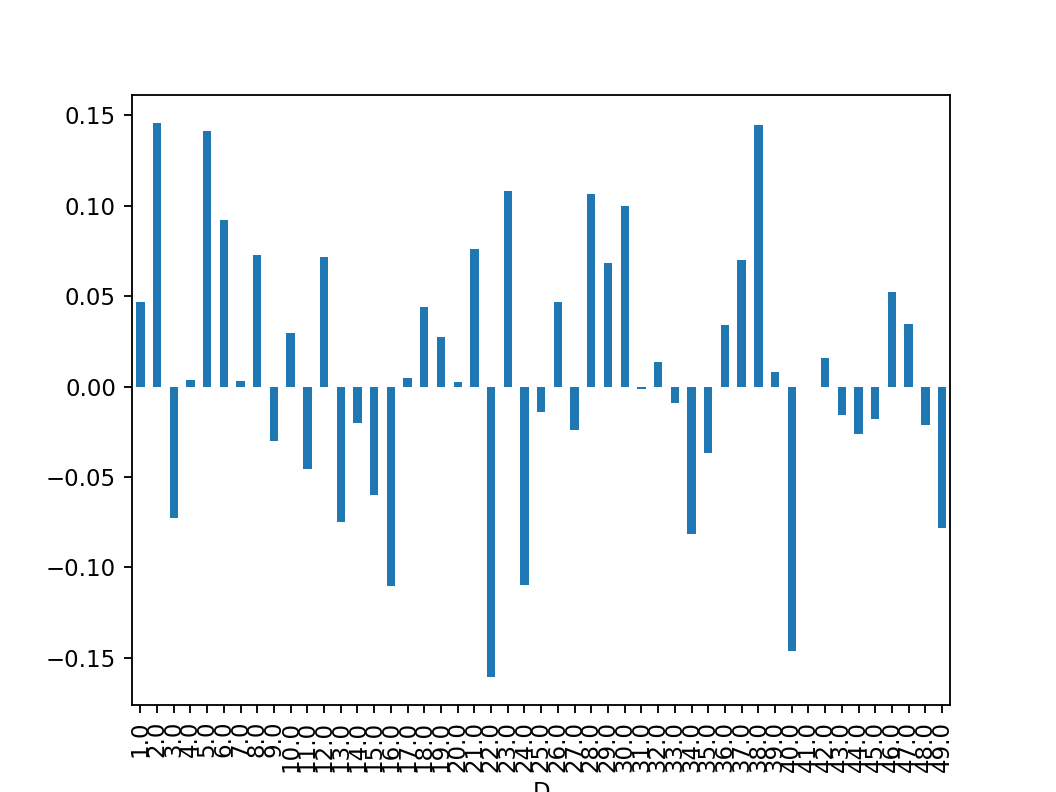

<AxesSubplot:xlabel='D'>

In [20]:
%matplotlib notebook
df.groupby('D')['C'].mean().plot(kind='bar')

In [26]:
df.groupby(['A_', 'D']).mean()

C
A_ D             
-3 2.0  -0.155647
   3.0  -1.265840
   4.0   2.063549
   8.0  -0.503455
   10.0  0.011806
...           ...
 3 33.0  0.422120
   39.0  0.837522
   43.0  1.632191
   47.0  0.297073
   49.0 -0.189769

[267 rows x 1 columns]

In [27]:
df['A'] = df.groupby('D')['A_'].apply(lambda x: x.fillna(x.mean()))

<IPython.core.display.Javascript object>


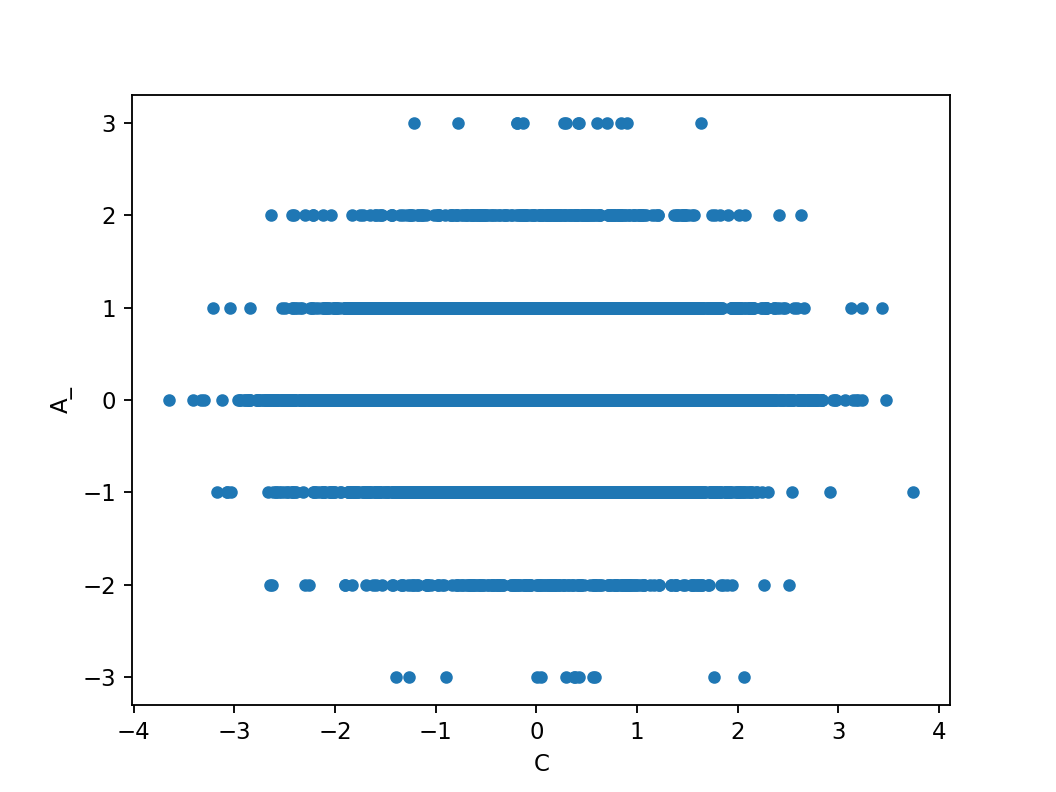

<AxesSubplot:xlabel='C', ylabel='A_'>

In [37]:
df.plot(x='C', y='A_', kind='scatter')